<a href="https://colab.research.google.com/github/girinath18/low2high_resolution/blob/main/SDUpscaler_PythonCodeTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU diffusers transformers accelerate scipy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 65.2 MB/s eta 0:00:00


# Hugging Face Implementation

In [2]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [3]:
# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/485 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

low_res_scheduler/scheduler_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/982 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/221M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
def get_low_res_img(url, shape):
    response = requests.get(url)
    low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
    low_res_img = low_res_img.resize(shape)
    return low_res_img

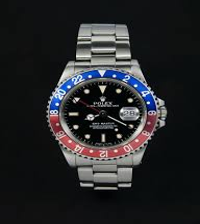

In [68]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPn9YWMZee1pQm9L0IVcQ14ihp08TjvnhkOw&s"
shape = (200, 224)
low_res_img = get_low_res_img(url, shape)

low_res_img

  0%|          | 0/75 [00:00<?, ?it/s]

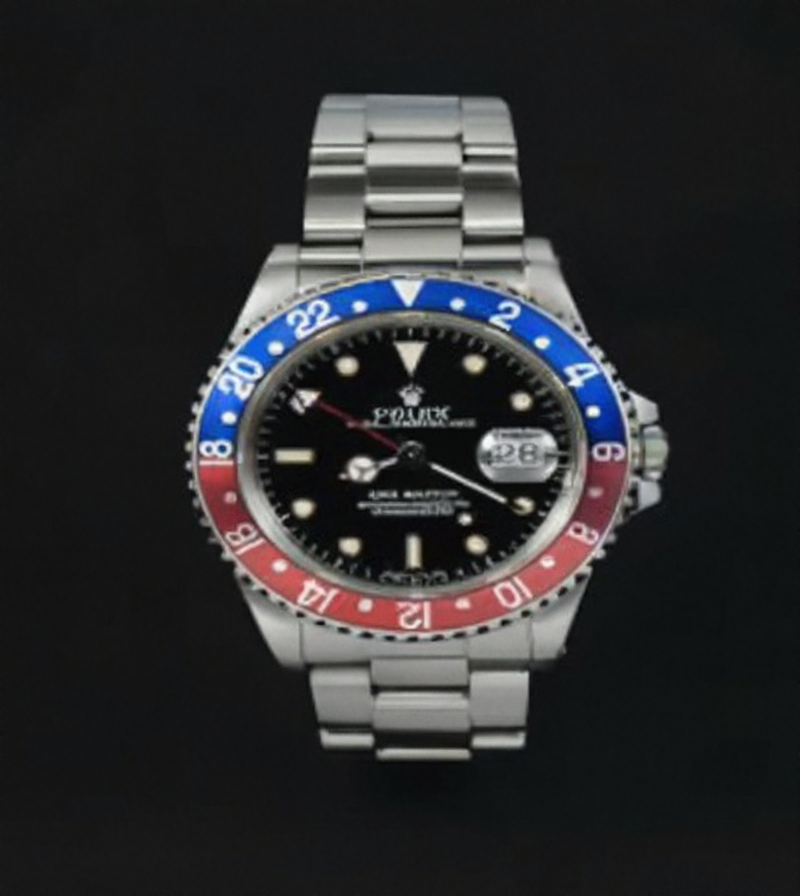

In [69]:
prompt = "with stable , and high accuary resolution "
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image

  0%|          | 0/75 [00:00<?, ?it/s]

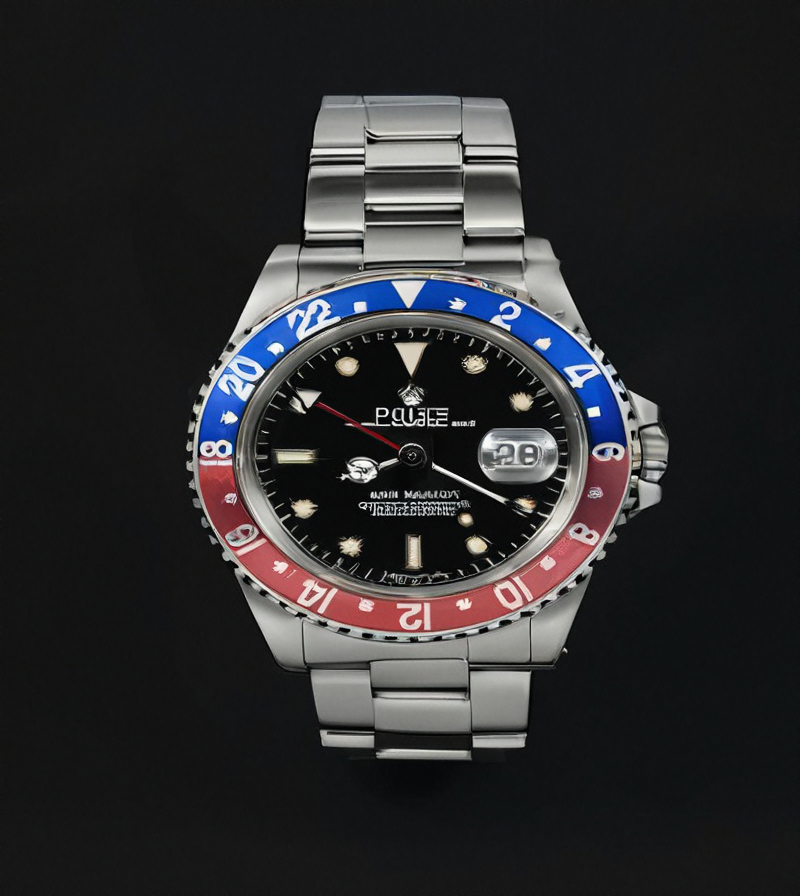

In [70]:
prompt = "UHD, 4k, hyper realistic, extremely detailed, professional, vibrant, not grainy, smooth"
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image

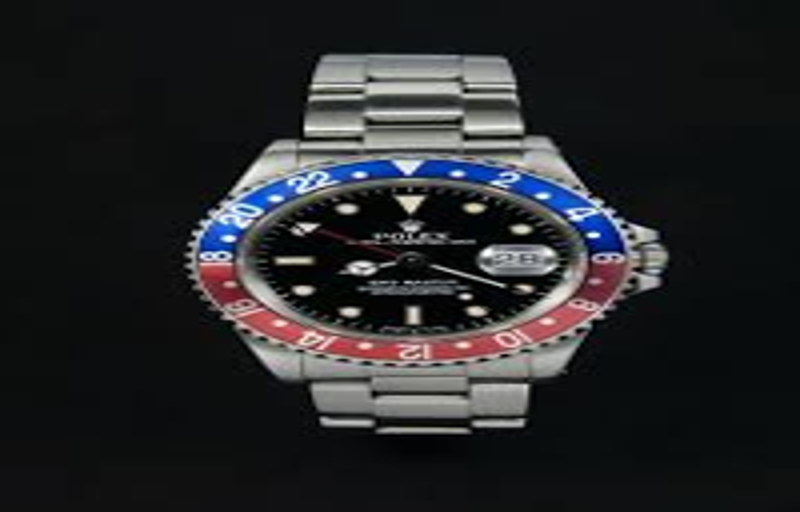

In [71]:
upscaled_interpolation = low_res_img.resize((800, 512))
upscaled_interpolation

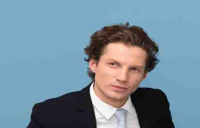

In [45]:
url = "https://shiropro.jp/wp-content/uploads/2019/10/12-1-2.jpg"
shape = (200, 128)
low_res_img = get_low_res_img(url, shape)

low_res_img

  0%|          | 0/75 [00:00<?, ?it/s]

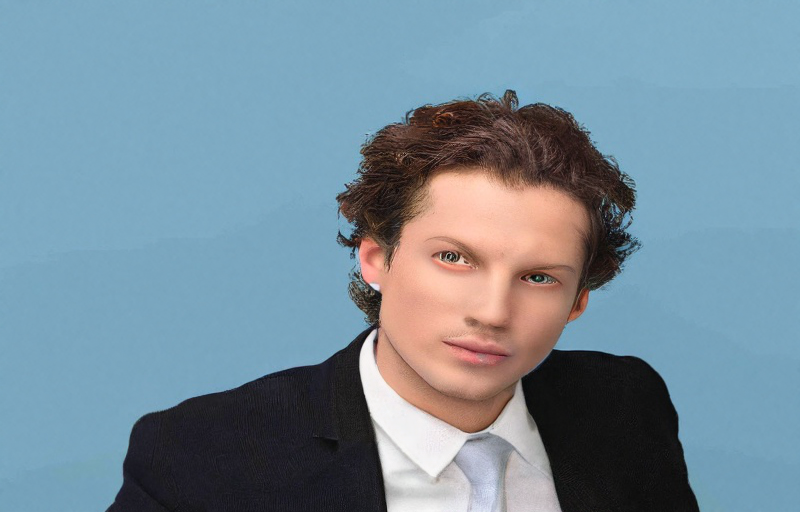

In [46]:
prompt = "an young Man"
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image